# 山本担当分 レポート課題

In [1]:
import numpy as np
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
    'arrowsize': 15,
}

- 締め切り: 2025年7月31日（木）23:59
- 提出先: 学務情報システム
- 提出形式
    - [指定したテンプレートファイル](https://b.hontolab.org/graphanalysis-report-template)（Wordファイル）を用いて解答を作成すること
    - 提出時にはWordファイルをPDFファイルに変換すること
- 留意事項: 問3で用いるデータをダウンロードするためのパスワードは，別途学務情報システム経由でお知らせします

---

## 問1: ノードの媒介中心性（20点）

以下はあるソーシャルネットワークグラフ$G_{social}$である．
グラフ$G_{social}$中におけるノードA，B，およびCの媒介中心性を計算過程を示しながら求めなさい．
なお，本課題のノード$n$の媒介中心性の計算において，ノードから別ノードへの最短経路が$n$を経由するもの以外にも存在する場合，$n$を経由する最短経路のみを計算対象としなさい．

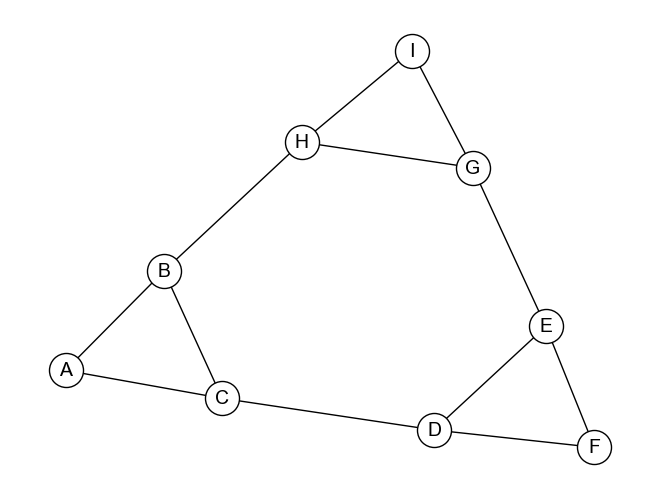

In [3]:
G_social = nx.Graph()
G_social.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
G_social.add_edges_from([
    ('A', 'B'), ('A', 'C'),
    ('B', 'C'), ('B', 'H'),
    ('C', 'D'),
    ('H', 'I'), ('H', 'G'),
    ('I', 'G'), ('G', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F')
])

pos = nx.spring_layout(G_social, seed=1)
nx.draw(G_social, pos, **DRAW_CONFIG)

## 問2: PageRank（合計40点）
### 問2-(1): シンプルなPageRank（20点）

以下のグラフ上のノードの重要度について，下記手順（単純なPageRankアルゴリズム）で計算したい．
1. すべてのノードの重要度を$\frac{1}{N}$で初期化
2. ノード$x$の重要度$p(x)$を右式で更新: $p(x)=\sum_{y \in link\_to(x)} \frac{1}{deg_{out}(y)}p(y)$
3. ステップ2をスコアが収束するまで繰り返す

ただし，$N$はノード数，$link\_to(x)$はノード$x$にエッジを張っているノードの集合，$deg_{out}(y)$はノード$y$の出次数とする．

ステップ2を3回繰り返したときの各ノードの重要度の値を計算しなさい．
また，ステップ2を3回繰り返した際の値の変化傾向から，ステップ2を無限に繰り返した際に得られるノードの重要度の収束値を予想しなさい．
なお，重要度の計算を手計算で行う場合はその過程を，プログラミングで行う場合はコードを解答とともに示しなさい．

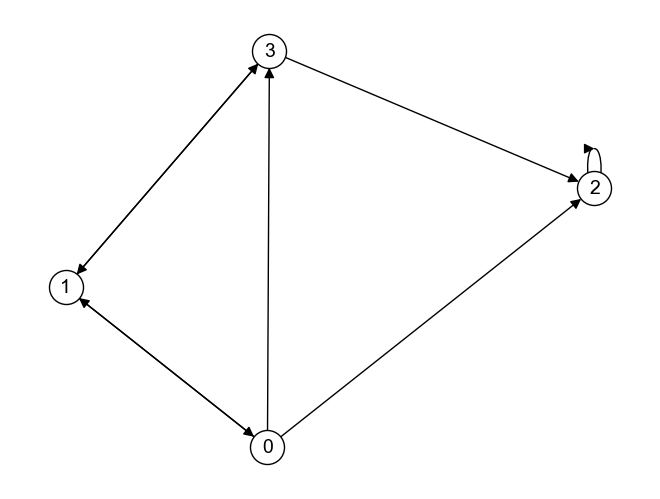

In [4]:
G = nx.DiGraph([
    (0, 1), (0, 2), (0, 3), 
    (1, 0), (1, 3),
    (2, 2),
    (3, 1), (3, 2)
])

pos = nx.spring_layout(G, seed=777)
nx.draw(G, pos, **DRAW_CONFIG)

### 問2-(2): PageRankの解釈（20点）

グラフ$G$に含まれるノード数を$N$，ノード$x$にエッジを張っているノード集合を$link\_to(x)$，ノード$y$の出次数を$deg_{out}(y)$，$\alpha$を0以上1以下の実数とするとき，$G$に含まれるノード$x$のPageRank値$p(x)$は，以下の式によって再帰的に計算される．

$$
p(x) = \alpha (\sum_{y \in link\_to(x)} \frac{1}{deg_{out}(y)}p(y)) + (1 - \alpha)\frac{1}{N}
$$

グラフ$G$の各ノードのPageRank値を上の式に従って計算したとき，どのノードのPageRank値も少なくとも$\frac{1-\alpha}{N}$以上になることを示しなさい．
また，$\alpha$が0に近づくにつれて，各ノードのPageRank値がどのような値になるか，ノード間のPageRank値の違いがどのような意味合いを持つのか述べなさい．

## 問3: 社会ネットワーク分析（合計40点）

以下のグラフ$G_{edo}$は，[人文学オープンデータ共同利用センター](https://codh.rois.ac.jp/)が公開しているデータベース[江戸買物案内](https://codh.rois.ac.jp/edo-shops/iiif-curation-finder/?lang=ja)をもとに，「[江戸買物独案内](https://ja.wikipedia.org/wiki/%E6%B1%9F%E6%88%B8%E8%B2%B7%E7%89%A9%E7%8B%AC%E6%A1%88%E5%86%85)」で登場する商人の交流関係の一部をグラフ化したものである（データベースからの課題用データ抽出，およびグラフ化は山本が実施）．
グラフ中のノードは江戸買物案内に2回以上登場する商人，エッジは同じ区域（居所（歴史地名大系））で商売を営んでいたことを意味する．

グラフ$G_{edo}$のデータは，レポート課題用に[コチラ](https://b.hontolab.org/edo_merchant)からダウンロードが可能である（パスワードは講義中に伝えます）．
また，ダウンロードしたデータは，以下のコードでNetworkX形式のグラフとして読み込める（データは`data/edo_merchant`ディレクトリに`edo_merchant.graphml`という名前で保存したとする）．

In [5]:
G_edo = nx.read_graphml(path="data/edo_merchant/edo_merchant.graphml")

# # グラフG_edoのノードから10件を表示
# list(G_edo.nodes)[:10]

# # 玉屋市郎兵衛の隣接ノード（同じ商売区域で商売を営んでいた人）を表示
# for neighbor in G_edo.neighbors('玉屋市郎兵衛'):
#     print(neighbor)

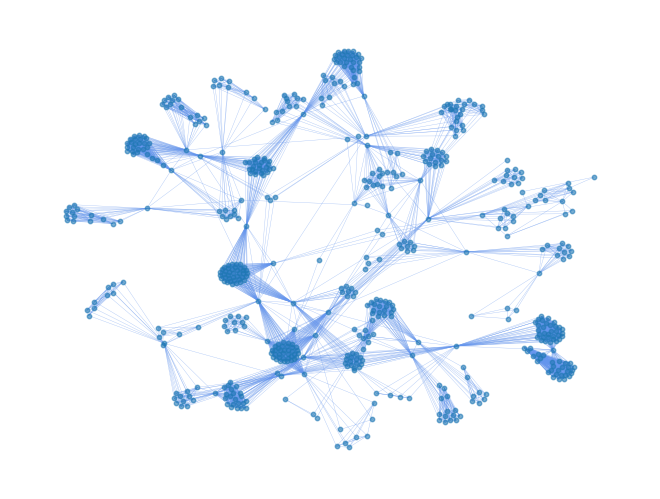

In [6]:
G_edo = nx.read_graphml(path="data/edo_merchant/edo_merchant.graphml")

EDO_DRAW_CONFIG = {
    'node_size': 10,
    'with_labels': False,    
    'edge_color': 'cornflowerblue',
    'width': 0.25,
    'alpha': 0.6,
}

pos = nx.spring_layout(G_edo, iterations=150, seed=1234, k=0.5)
nx.draw(G_edo, pos, **EDO_DRAW_CONFIG)

### 問3-(1): 影響力のある商人（15点）

グラフ$G_{edo}$をもとに，データ中に含まれる商人のうち「最も影響力のあった商人」の上位10名を求めなさい．
解答においては，上位10名を求める過程や検討の際に用いたプログラミングコードも合わせて提示すること．
なお，「影響力」の定義は解答者が定めればよいが，その定義を必ず解答の中で宣言すること．


### 問3-(2): 商売区域をつなぐ重要な商人（15点）

可視化されたグラフが示しているように，グラフ$G_{edo}$においてノード（商人）は商売区域ごとにコミュニティを形成しているように見える．
現代においてもそうであるように，ある地域から別の地域，しかも大きな区域に進出をする際には，商売区域をつなぐような人物は重宝されたと考えられる．

グラフ$G_{edo}$をもとに，データ中に含まれる商人のうち「コミュニティの橋渡し役として重要であったと考えられる商人」の上位10名を求めなさい．
解答においては，上位10名を求める過程や検討の際に用いたプログラミングコードも合わせて提示すること．
なお，「橋渡し役としての重要度」の定義は解答者が定めればよいが，その定義を必ず解答の中で宣言すること．


### 問3-(3): 鰹節・塩干肴問屋業界で影響力のある商人（10点）

[コチラ](data/edo_merchant/himono_merchants.tsv)からダウンロードできるデータには，グラフ$G_{edo}$に含まれる商人のうち，「鰹節・塩干肴問屋」を営んでいた商人の名前が収められている．
グラフ$G_{edo}$をもとに，「鰹節・塩干肴問屋」を営む商人の界隈で影響力のあった商人の上位5名を求めなさい．
解答においては，上位5名を求める過程や検討の際に用いたプログラミングコードも合わせて提示すること．
なお，「影響力」の定義は解答者が定めればよいが，その定義を必ず解答の中で宣言すること．